In [24]:
import cv2
import numpy as np
import os
import glob
import mahotas as mt
from sklearn.svm import LinearSVC
import csv
import time
import pandas as pd
from sklearn import preprocessing
from skimage.filters import sobel
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
tic = time.time()

SIZE = 128

# function to extract haralick textures from an image
def extract_features(image):
    # calculate haralick texture features for 4 types of adjacency
    textures = mt.features.haralick(image)

    # take the mean of it and return it
    ht_mean  = textures.mean(axis=0)
    return ht_mean


train_images = []
train_labels = [] 
train_features=[]
for directory_path in glob.glob("C:\\JupyterLab\\PCA\\fungus-bacterium\\data\\treino\\*"):
    cur_path = os.path.join(directory_path, "*.jpg")
    cur_label = directory_path.split("\\")[-1]                      #!!!!!!!!!!!!!!!!!!!!!CUIDADO! ESSE É PARA WINDOWS
    #label = directory_path.split("/")[-1]                        #!!!!!!!!!!!!!!!!!!!!!CUIDADO! ESSE É PARA LINUX
    print(cur_label)
    i = 0
    with open('Haralick_BreaKHis_temp.csv','a+',newline='') as obj:
                writer = csv.writer(obj)
                if i==0:
                        writer.writerow(['Haralick1','Haralick2','Haralick3','Haralick4','Haralick5','Haralick6','Haralick7','Haralick8','Haralick9',
                                         'Haralick10','Haralick11','Haralick12','Haralick13'])
                for img_path in glob.glob(cur_path):
                    print ("Processing Image - {} in {}".format(i, cur_label))
                    #read the training image
                    image=cv2.imread(img_path)
                    img = cv2.resize(image, (SIZE, SIZE)) #Resize images

                    #convert the image to grayscale
                    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                    
                    #extract haralick texture from image
                    features=extract_features(gray)
                    #print(features)
                    
                    #append the feature vector and label
                    train_images.append(gray)
                    train_features.append(features)
                    train_labels.append(cur_label)

                    
                    writer.writerow(features)

                    #show loop update
                    i+=1


# have a look at the size of our feature vector and labels
print ("Training features: {}".format(np.array(train_features).shape))
print ("Training labels: {}".format(np.array(train_labels).shape))
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_features = np.array(train_features)


test_images = []
test_labels = [] 
test_features=[]
for directory_path in glob.glob("C:\\JupyterLab\\PCA\\fungus-bacterium\\data\\teste\\*"):
    cur_path = os.path.join(directory_path, "*.jpg")
    cur_label = directory_path.split("\\")[-1]                      #!!!!!!!!!!!!!!!!!!!!!CUIDADO! ESSE É PARA WINDOWS
    #label = directory_path.split("/")[-1]                        #!!!!!!!!!!!!!!!!!!!!!CUIDADO! ESSE É PARA LINUX
    print(cur_label)
    i = 0
    with open('Haralick_BreaKHis_temp.csv','a+',newline='') as obj:
                writer = csv.writer(obj)
                if i==0:
                        writer.writerow(['Haralick1','Haralick2','Haralick3','Haralick4','Haralick5','Haralick6','Haralick7','Haralick8','Haralick9',
                                         'Haralick10','Haralick11','Haralick12','Haralick13'])
                for img_path in glob.glob(cur_path):


                    print ("Processing Image - {} in {}".format(i, cur_label))
                    #read the training image
                    image=cv2.imread(img_path)
                    img = cv2.resize(image, (SIZE, SIZE)) #Resize images

                    #convert the image to grayscale
                    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                    
                    #extract haralick texture from image
                    features=extract_features(gray)
                    #print(features)
                    
                    #append the feature vector and label
                    test_images.append(gray)
                    test_features.append(features)
                    test_labels.append(cur_label)

                    
                    writer.writerow(features)

                    #show loop update
                    i+=1

print ("Testing features: {}".format(np.array(test_features).shape))
print ("Testing labels: {}".format(np.array(test_labels).shape))
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_features = np.array(test_features)

toc = time.time()
print("Computation time is {} minutes.".format((toc-tic)/60))

bacterias
Processing Image - 0 in bacterias
Processing Image - 1 in bacterias
Processing Image - 2 in bacterias
Processing Image - 3 in bacterias
Processing Image - 4 in bacterias
Processing Image - 5 in bacterias
Processing Image - 6 in bacterias
Processing Image - 7 in bacterias
Processing Image - 8 in bacterias
Processing Image - 9 in bacterias
Processing Image - 10 in bacterias
Processing Image - 11 in bacterias
Processing Image - 12 in bacterias
Processing Image - 13 in bacterias
Processing Image - 14 in bacterias
Processing Image - 15 in bacterias
Processing Image - 16 in bacterias
Processing Image - 17 in bacterias
Processing Image - 18 in bacterias
Processing Image - 19 in bacterias
Processing Image - 20 in bacterias
fungos
Processing Image - 0 in fungos
Processing Image - 1 in fungos
Processing Image - 2 in fungos
Processing Image - 3 in fungos
Processing Image - 4 in fungos
Processing Image - 5 in fungos
Processing Image - 6 in fungos
Processing Image - 7 in fungos
Processing

In [2]:
#Encode labels from text (folder names) to integers.
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print('x_train len', len(x_train))

x_train len 51


In [4]:
print('x_test len', len(x_test))

x_test len 6


In [5]:
print(train_features[1])

[ 2.28423009e-03  4.73865178e+02  8.54439521e-01  1.62782171e+03
  2.46157521e-01  1.41008031e+02  6.03742165e+03  7.21535822e+00
  1.07038430e+01  3.44591413e-04  4.50060693e+00 -2.93347818e-01
  9.86890817e-01]


In [6]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor_train(dataset, features_list):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        input_img = x_train[image, :,:] #,:]
        img = input_img

    ################################################################
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature
        #df['Image_Name'] = image   #Capture image name as we read multiple images
        
        # FEATURE 2 - Bunch of Gabor filter responses
        
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with 1 and 3
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
         

        
        # FEATURE 3 Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1
       
        #Add more filters as needed
        list_zeros = [0]*(16384 - len(features_list[image]))
        combined_list = np.concatenate((features_list[image], list_zeros))
        df['Haralick'] = combined_list

        #Append features from current image to the dataset
        #image_dataset = image_dataset.append(df) ###USAR APPEND PARA PYTHON MAIS ANTIGO
        image_dataset = pd.concat([image_dataset, df], ignore_index=True)
        
    return image_dataset

In [14]:
####################################################################
#Extract features from training images
image_features = feature_extractor_train(x_train, train_features)
#print(image_features)

#Reshape to a vector for Random Forest / SVM training
n_features = image_features.shape
#print(n_features)
train_features = np.expand_dims(image_features, axis=0)
#print(train_features)
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features
print(X_for_RF)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [15]:
print(train_features)

[[[8.98039216e-01 3.00000000e+00 3.00000000e+00 ... 7.00000000e+00
   3.21143909e-02 2.22142805e-04]
  [8.50980392e-01 3.00000000e+00 3.00000000e+00 ... 7.00000000e+00
   5.08482450e-02 3.23318282e+02]
  [8.27450980e-01 2.00000000e+00 3.00000000e+00 ... 7.00000000e+00
   2.04006393e-02 9.52889583e-01]
  ...
  [4.90196078e-01 1.00000000e+00 2.00000000e+00 ... 4.00000000e+00
   5.22926877e-02 0.00000000e+00]
  [3.29411765e-01 1.00000000e+00 1.00000000e+00 ... 3.00000000e+00
   7.86577615e-02 0.00000000e+00]
  [3.64705882e-01 1.00000000e+00 0.00000000e+00 ... 4.00000000e+00
   6.66666667e-02 0.00000000e+00]]]


In [16]:
print(test_features)

[[ 1.85847249e-04  6.06315856e+02  8.40738631e-01  1.90329131e+03
   9.53994827e-02  1.73607372e+02  7.00684937e+03  8.34544647e+00
   1.29371834e+01  1.30462328e-04  5.32667463e+00 -2.53620965e-01
   9.87870443e-01]
 [ 6.58340117e-04  3.65898765e+02  9.24274320e-01  2.41410256e+03
   1.82661976e-01  1.67896931e+02  9.29051146e+03  8.07044858e+00
   1.18281730e+01  2.45599882e-04  4.68681297e+00 -3.33572064e-01
   9.95319368e-01]
 [ 1.60177184e-04  6.18358880e+02  7.99751025e-01  1.54559027e+03
   8.57129493e-02  2.49779981e+02  5.56400221e+03  8.16752735e+00
   1.30660675e+01  1.08092381e-04  5.51204643e+00 -2.01886518e-01
   9.71656534e-01]
 [ 7.02816225e-05  2.85382076e+03  4.64280254e-01  2.66357592e+03
   2.90522177e-02  2.40307600e+02  7.80048290e+03  8.42115912e+00
   1.40508736e+01  2.87979613e-05  6.76787800e+00 -1.61460639e-01
   9.56652011e-01]
 [ 9.10501670e-05  2.24883213e+03  1.99163379e-01  1.40409150e+03
   2.79261421e-02  1.58904229e+02  3.36753386e+03  7.86670168e+00


In [17]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor_test(dataset, features_list):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_test.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        input_img = x_test[image, :,:] #,:]
        img = input_img

    ################################################################
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature
        #df['Image_Name'] = image   #Capture image name as we read multiple images
        
        # FEATURE 2 - Bunch of Gabor filter responses
        
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with 1 and 3
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
         

        
        # FEATURE 3 Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1
       
        #Add more filters as needed
        list_zeros = [0]*(16384 - len(features_list[image]))
        combined_list = np.concatenate((features_list[image], list_zeros))
        df['Haralick'] = combined_list

        #Append features from current image to the dataset
        #image_dataset = image_dataset.append(df) ###USAR APPEND PARA PYTHON MAIS ANTIGO
        image_dataset = pd.concat([image_dataset, df], ignore_index=True)
        
    return image_dataset

In [18]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features_final = feature_extractor_test(x_test, test_features)
test_features_final = np.expand_dims(test_features_final, axis=0)
#print(test_features)
test_for_RF = np.reshape(test_features_final, (x_test.shape[0], -1))

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [19]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=88, random_state = 2)

## 108 e 60 -> 66.6667%
## 78 e 65 -> 66.66667% mas uma img melhor
## 88 e 2 -> 83.333334%
#Can also use SVM but RF is faster and may be more accurate.
#from sklearn import svm
#SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
#SVM_model.fit(X_for_RF, y_train)

# Fit the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=88, random_state=2)

In [20]:
#Predict on test
test_prediction = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)
#print(test_prediction)
#print(test_labels)

Accuracy =  0.8333333333333334


<Axes: >

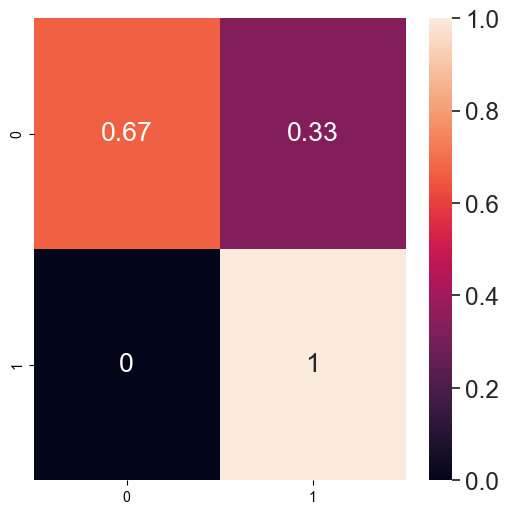

In [25]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)
cm = cm / cm.astype(np.float64).sum(axis=1)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

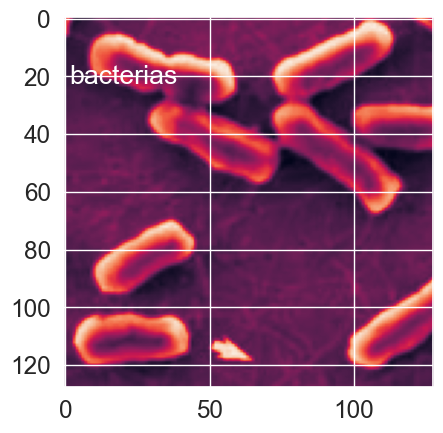

In [26]:
i = 1
plt.text(20, 20, test_prediction[i], dict(color='white', va='center', ha='center'))
plt.imshow(x_test[i])
plt.show()

In [27]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

In [28]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 12, 23, 34, 45, 56, 66, 77, 88, 99, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 23, 45, 67, 89, 111, 133, 155, 177, 200]}


In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_for_RF, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\vitoria220056\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vitoria220056\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vitoria220056\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\vitoria220056\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 66

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 12, 23, 34, 45, 56, 66,
                                                      77, 88, 99, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 23, 45, 67, 89, 111,
                                                         133, 155, 177, 200]},
                   random_state=42, verbose=2)

In [30]:
rf_random.best_params_

{'n_estimators': 133,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 77,
 'bootstrap': False}

In [31]:
RF_best_model = RandomForestClassifier(n_estimators=67, min_samples_split=5, min_samples_leaf=1, max_features='sqrt',max_depth=88 , bootstrap=False)
RF_best_model.fit(X_for_RF, y_train)

RandomForestClassifier(bootstrap=False, max_depth=88, min_samples_split=5,
                       n_estimators=67)

In [32]:
#Predict on test
best_test_prediction = RF_best_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
best_test_prediction = le.inverse_transform(best_test_prediction)

Accuracy =  0.8333333333333334


<Axes: >

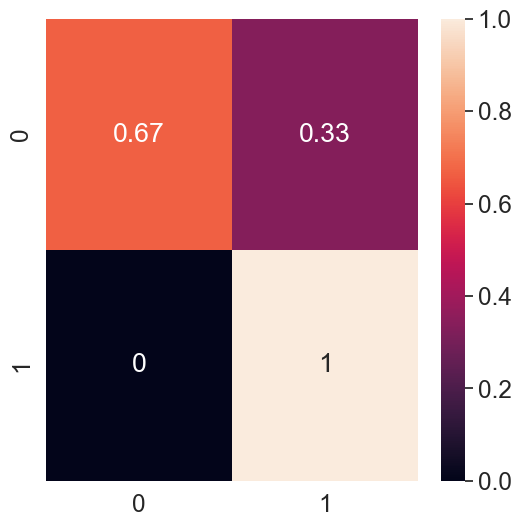

In [35]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, best_test_prediction))
cm = confusion_matrix(test_labels, best_test_prediction)
cm = cm / cm.astype(np.float64).sum(axis=1)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

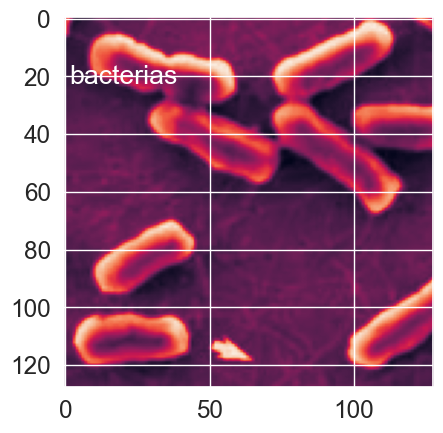

In [36]:
i = 1
plt.text(20, 20, best_test_prediction[i], dict(color='white', va='center', ha='center'))
plt.imshow(x_test[i])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [58, 68, 78, 88, 98, 108],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 5, 8, 10, 12],
    'n_estimators': [47, 57, 67, 77, 87, 97]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)